<a href="https://colab.research.google.com/github/JannaW0402/Pump-it-Up/blob/main/869model_0725_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install pycaret
import pandas as pd
import numpy as np 
from pycaret.classification import *

     |████████████████████████████████| 264 kB 20.1 MB/s 
     |████████████████████████████████| 271 kB 53.5 MB/s 
     |████████████████████████████████| 80 kB 6.9 MB/s 
     |████████████████████████████████| 167 kB 40.2 MB/s 
     |████████████████████████████████| 14.4 MB 56 kB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 1.7 MB 55.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 105 kB 52.1 MB/s 
     |████████████████████████████████| 6.8 MB 29.4 MB/s 
     |████████████████████████████████| 2.0 MB 33.8 MB/s 
     |████████████████████████████████| 1.3 MB 28.8 MB/s 
     |████████████████████████████████| 248 kB 48.5 MB/s 
     |████████████████████████████████| 3.1 MB 29.8 MB/s 
     |████████████████████████████████| 62 kB 695 kB/s 
     |████████████████████

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Train_clean.csv to Train_clean.csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Test_value_clean.csv to Test_value_clean (1).csv


In [7]:
Train = pd.read_csv('Train_clean.csv')
Test = pd.read_csv('Test_value_clean.csv')

In [8]:
Train = Train.drop(Train.columns[[0,1]],axis=1)
Test = Test.drop(Test.columns[[0,1]],axis=1)

In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [10]:
Test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0.0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321.0,True,GeoData Consultants Ltd,Parastatal,Other,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0.0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300.0,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Puma Secondary,0.0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500.0,True,GeoData Consultants Ltd,VWC,Other,True,2010,other,other,other,vwc,user group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0.0,Ruvuma and Southern Coast,Kipindimbi,Lindi,8,43,Liwale,Mkutano,250.0,True,GeoData Consultants Ltd,VWC,Other,True,1987,other,other,other,vwc,user group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,62.5,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0.0,Ruvuma and Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60.0,True,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
#Train = Train.drop(columns=['wpt_name','num_private','ward','recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type'])

In [ ]:
#Test = Test.drop(columns=['wpt_name','num_private','ward','recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type'])

In [11]:
#Train = Train[['quantity_group','waterpoint_type_group','extraction_type_class','population','construction_year','funder','payment_type','source_type','gps_height',"status_group"]]
#Test = Test[['quantity_group','waterpoint_type_group','extraction_type_class','population','construction_year','funder','payment_type','source_type','gps_height']]      
Train = Train[['id','quantity','construction_year','ward','waterpoint_type','funder','lga','subvillage','gps_height',"status_group"]]
Test = Test[['id','quantity','construction_year','ward','waterpoint_type','funder','lga','subvillage','gps_height']]


In [12]:
# Function to set up # of category for features
test_cat = 20
def max_cat(col):
    if len(Train[col].value_counts()) > (test_cat):
        top_value = Train[col].value_counts()[:(test_cat)].index.tolist()
        Train.loc[-Train[col].isin(top_value),col]='Others'
                
    return Train

def max_cat_test(col):
    if len(Test[col].value_counts()) > (test_cat):
        top_value = Test[col].value_counts()[:(test_cat)].index.tolist()
        Test.loc[-Test[col].isin(top_value),col]='Others'
                
    return Test

In [ ]:
Train.describe(include=[np.object,np.int64])

,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height,status_group
count,59400.000000,59400,59400.000000,59400,59400,59400,59400,59400,59400.000000,59400
unique,NaN,5,NaN,2092,7,1890,125,19284,NaN,3
top,NaN,enough,NaN,Igosi,communal standpipe,Government Of Tanzania,Njombe,Madukani,NaN,functional
freq,NaN,33186,NaN,307,28522,12719,2503,879,NaN,32259
mean,37115.131768,NaN,1996.191162,NaN,NaN,NaN,NaN,NaN,668.297239,NaN
std,21453.128371,NaN,10.291877,NaN,NaN,NaN,NaN,NaN,693.116350,NaN
min,0.000000,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,-90.000000,NaN
25%,18519.750000,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,37061.500000,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,369.000000,NaN
75%,55656.500000,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,1319.250000,NaN


In [ ]:
Test.describe(include=[np.object,np.int64])

,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height
count,14850.000000,14850,14850.000000,14850,14850,14850,14850,14850,14850.000000
unique,NaN,5,NaN,1959,7,976,125,8440,NaN
top,NaN,enough,NaN,Igosi,communal standpipe,Government Of Tanzania,Njombe,Shuleni,NaN
freq,NaN,8336,NaN,79,7106,3084,625,239,NaN
mean,37161.972929,NaN,1996.402222,NaN,NaN,NaN,NaN,NaN,655.147609
std,21359.364833,NaN,10.029187,NaN,NaN,NaN,NaN,NaN,691.261185
min,10.000000,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,-57.000000
25%,18727.000000,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,37361.500000,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,344.000000
75%,55799.750000,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,1308.000000


In [13]:
max_cat('ward')
max_cat('funder')
max_cat('subvillage')

max_cat_test('ward')
max_cat_test('funder')
max_cat_test('subvillage')




,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height
0,50785,seasonal,2012,Others,other,Others,Mbulu,Others,1996
1,51630,insufficient,2000,Others,communal standpipe,Government Of Tanzania,Arusha Rural,Others,1569
2,17168,insufficient,2010,Others,other,Government Of Tanzania,Singida Rural,Others,1567
3,45559,dry,1987,Others,other,Others,Liwale,Others,267
4,49871,enough,2000,Others,communal standpipe,Others,Mbinga,Others,1260
...,...,...,...,...,...,...,...,...,...
14845,39307,enough,1988,Others,communal standpipe,Danida,Bagamoyo,Others,34
14846,18990,insufficient,1994,Others,hand pump,Others,Kilindi,Others,0
14847,28749,insufficient,2010,Others,communal standpipe,Government Of Tanzania,Singida Rural,Others,1476
14848,33492,insufficient,2009,Others,communal standpipe,Others,Songea Rural,Others,998


In [14]:
Train_data = Train.iloc[:100:,:]

In [ ]:
Train.info()
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 59400 non-null  int64 
 1   quantity           59400 non-null  object
 2   construction_year  59400 non-null  int64 
 3   ward               59400 non-null  object
 4   waterpoint_type    59400 non-null  object
 5   funder             59400 non-null  object
 6   lga                59400 non-null  object
 7   subvillage         59400 non-null  object
 8   gps_height         59400 non-null  int64 
 9   status_group       59400 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 14850 non-null  int64 
 1   quantity           1485

In [15]:
clf1 = setup(Train, target = 'status_group', session_id=123, log_experiment=True, experiment_name='pump')

,Description,Value
0,session_id,123
1,Target,status_group
2,Target Type,Multiclass
3,Label Encoded,"functional: 0, functional needs repair: 1, non..."
4,Original Data,"(59400, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7551,0.8634,0.5617,0.7542,0.7339,0.5197,0.5402,4.3240
rf,Random Forest Classifier,0.7416,0.8492,0.5956,0.7321,0.7354,0.5193,0.5207,12.6090
et,Extra Trees Classifier,0.7343,0.8279,0.6001,0.7283,0.7307,0.5106,0.5112,16.2850
gbc,Gradient Boosting Classifier,0.7337,0.8305,0.5313,0.7456,0.7059,0.4682,0.5038,44.8790
ridge,Ridge Classifier,0.7266,0.0000,0.5153,0.7176,0.6977,0.4588,0.4796,0.6310
lda,Linear Discriminant Analysis,0.7187,0.8264,0.5584,0.7164,0.7051,0.4594,0.4740,4.7650
ada,Ada Boost Classifier,0.7149,0.7782,0.5168,0.7067,0.6892,0.4372,0.4582,3.4910
dt,Decision Tree Classifier,0.6961,0.7292,0.5763,0.6966,0.6964,0.4491,0.4491,1.1170
nb,Naive Bayes,0.6615,0.7451,0.4468,0.6272,0.6172,0.3103,0.3473,0.1520
lr,Logistic Regression,0.5836,0.6130,0.3740,0.3948,0.4628,0.1068,0.1091,9.6600


In [16]:
rf = create_model('rf') #0.7416

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7436,0.8473,0.5985,0.7337,0.7372,0.5228,0.5241
1,0.7422,0.8544,0.5904,0.7309,0.7346,0.5184,0.5201
2,0.7434,0.8453,0.5998,0.7350,0.7377,0.5229,0.5244
3,0.7410,0.8423,0.5920,0.7316,0.7344,0.5167,0.5188
4,0.7480,0.8625,0.5984,0.7375,0.7413,0.5310,0.5322
5,0.7508,0.8575,0.5984,0.7398,0.7432,0.5343,0.5362
6,0.7369,0.8455,0.5863,0.7274,0.7307,0.5105,0.5121
7,0.7321,0.8415,0.5818,0.7225,0.7258,0.5014,0.5031
8,0.7400,0.8432,0.5991,0.7316,0.7350,0.5192,0.5199
9,0.7376,0.8523,0.6107,0.7315,0.7338,0.5155,0.5161


In [17]:
et = create_model('et') #0.7343

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7297,0.8279,0.5946,0.7231,0.7260,0.5023,0.5027
1,0.7376,0.8305,0.6035,0.7301,0.7331,0.5149,0.5156
2,0.7333,0.8263,0.6053,0.7287,0.7306,0.5099,0.5103
3,0.7340,0.8197,0.5955,0.7280,0.7300,0.5083,0.5094
4,0.7400,0.8408,0.5988,0.7324,0.7357,0.5209,0.5212
5,0.7443,0.8348,0.6081,0.7375,0.7399,0.5269,0.5279
6,0.7282,0.8275,0.5855,0.7213,0.7241,0.4983,0.4990
7,0.7273,0.8205,0.5887,0.7207,0.7232,0.4965,0.4973
8,0.7338,0.8198,0.6024,0.7286,0.7309,0.5119,0.5121
9,0.7351,0.8310,0.6183,0.7327,0.7338,0.5159,0.5161


In [18]:
lightgbm = create_model('lightgbm') #0.7551

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7549,0.8591,0.5621,0.7549,0.7340,0.5192,0.5399
1,0.7578,0.8665,0.5571,0.7566,0.7350,0.5240,0.5447
2,0.7593,0.8646,0.5765,0.7615,0.7406,0.5294,0.5488
3,0.7468,0.8566,0.5583,0.7463,0.7261,0.5031,0.5256
4,0.7629,0.8689,0.5613,0.7586,0.7404,0.5349,0.5542
5,0.7557,0.8703,0.5587,0.7546,0.7336,0.5201,0.5413
6,0.7547,0.8610,0.5589,0.7530,0.7331,0.5181,0.5413
7,0.7475,0.8571,0.5556,0.7433,0.7264,0.5055,0.5247
8,0.7523,0.8599,0.5606,0.7518,0.7312,0.5147,0.5333
9,0.7592,0.8700,0.5681,0.7612,0.7386,0.5279,0.5480


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
tuned_et = tune_model(et) # 0.7126

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7138,0.7646,0.5081,0.7519,0.6782,0.4179,0.4760
1,0.7083,0.7667,0.4977,0.7412,0.6707,0.4060,0.4616
2,0.7172,0.7758,0.5216,0.7594,0.6842,0.4263,0.4841
3,0.7044,0.7664,0.5000,0.7497,0.6657,0.3959,0.4605
4,0.7203,0.7805,0.5083,0.7454,0.6852,0.4326,0.4866
5,0.7097,0.7792,0.5059,0.7433,0.6741,0.4103,0.4660
6,0.7100,0.7709,0.5014,0.7449,0.6716,0.4087,0.4733
7,0.7049,0.7620,0.4986,0.7411,0.6670,0.3985,0.4579
8,0.7189,0.7681,0.5104,0.7529,0.6834,0.4290,0.4854
9,0.7185,0.7764,0.5138,0.7567,0.6841,0.4283,0.4855


In [ ]:
tuned_rf = tune_model(rf) # 0.7104

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7112,0.7456,0.4913,0.7487,0.6703,0.4084,0.4726
1,0.7063,0.7477,0.4854,0.7422,0.6639,0.3977,0.4623
2,0.7128,0.7486,0.5040,0.7556,0.6756,0.4144,0.4751
3,0.7018,0.7367,0.4802,0.7629,0.6570,0.3861,0.4544
4,0.7201,0.7568,0.5021,0.7528,0.6823,0.4295,0.4871
5,0.7078,0.7487,0.4937,0.7462,0.6681,0.4031,0.4629
6,0.7078,0.7293,0.4854,0.7436,0.6641,0.3995,0.4700
7,0.7018,0.7313,0.4855,0.7409,0.6597,0.3887,0.4523
8,0.7174,0.7466,0.4942,0.7596,0.6767,0.4222,0.4827
9,0.7171,0.7513,0.4964,0.7641,0.6770,0.4215,0.4826


In [ ]:
tuned_lightgbm = tune_model(lightgbm) # 0.7503

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:48:17
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [22]:
bagged_rf = ensemble_model(rf) #0.7570

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7583,0.8586,0.5983,0.7473,0.7477,0.5422,0.5469
1,0.7496,0.8640,0.5813,0.7357,0.7381,0.5259,0.5302
2,0.7585,0.8587,0.5961,0.7467,0.7480,0.5432,0.5479
3,0.7549,0.8536,0.5910,0.7433,0.7438,0.5351,0.5406
4,0.7672,0.8719,0.6026,0.7552,0.7569,0.5599,0.5643
5,0.7660,0.8693,0.6023,0.7549,0.7549,0.5561,0.5612
6,0.7508,0.8581,0.5889,0.7396,0.7408,0.5289,0.5337
7,0.7494,0.8533,0.5844,0.7369,0.7384,0.5254,0.5304
8,0.7554,0.8558,0.5946,0.7428,0.7455,0.5393,0.5425
9,0.7602,0.8635,0.6192,0.7520,0.7530,0.5499,0.5530


In [ ]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

In [19]:
bagged_et = ensemble_model(et) #0.7457


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7465,0.8506,0.6001,0.7368,0.7402,0.5282,0.5296
1,0.7465,0.8551,0.5945,0.7352,0.7388,0.5263,0.5281
2,0.7441,0.8495,0.5945,0.7337,0.7370,0.5222,0.5241
3,0.7446,0.8469,0.5951,0.7354,0.7379,0.5232,0.5255
4,0.7566,0.8642,0.6031,0.7455,0.7493,0.5458,0.5474
5,0.7576,0.8614,0.6147,0.7487,0.7510,0.5473,0.5494
6,0.7367,0.8501,0.5905,0.7281,0.7310,0.5107,0.5122
7,0.7386,0.8446,0.5921,0.7288,0.7320,0.5128,0.5145
8,0.7407,0.8461,0.5971,0.7310,0.7345,0.5182,0.5193
9,0.7455,0.8564,0.6139,0.7386,0.7412,0.5292,0.5301


In [ ]:
boosted_et = ensemble_model(et, method = 'Boosting')


In [20]:
bagged_lightgbm = ensemble_model(lightgbm) #0.7529

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7540,0.8581,0.5609,0.7553,0.7328,0.5167,0.5385
1,0.7542,0.8655,0.5502,0.7538,0.7302,0.5154,0.5379
2,0.7581,0.8645,0.5741,0.7654,0.7385,0.5254,0.5465
3,0.7431,0.8559,0.5518,0.7447,0.7210,0.4941,0.5191
4,0.7619,0.8676,0.5616,0.7587,0.7396,0.5325,0.5535
5,0.7583,0.8705,0.5618,0.7605,0.7361,0.5244,0.5476
6,0.7518,0.8608,0.5521,0.7511,0.7285,0.5106,0.5363
7,0.7415,0.8558,0.5465,0.7381,0.7188,0.4918,0.5131
8,0.7492,0.8590,0.5534,0.7495,0.7265,0.5066,0.5282
9,0.7573,0.8694,0.5676,0.7614,0.7368,0.5238,0.5441


In [ ]:

boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

In [23]:
blender = blend_models(estimator_list = [bagged_lightgbm,bagged_rf,lightgbm], method ='soft')# 0.7640

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7641,0.8682,0.5762,0.7583,0.7460,0.5415,0.5563
1,0.7631,0.8759,0.5708,0.7620,0.7430,0.5372,0.5542
2,0.7672,0.8723,0.5883,0.7664,0.7502,0.5475,0.5636
3,0.7530,0.8666,0.5688,0.7517,0.7339,0.5175,0.5365
4,0.7737,0.8798,0.5797,0.7668,0.7546,0.5599,0.5746
5,0.7689,0.8807,0.5862,0.7689,0.7513,0.5501,0.5667
6,0.7636,0.8705,0.5717,0.7565,0.7449,0.5399,0.5571
7,0.7593,0.8665,0.5742,0.7558,0.7409,0.5313,0.5476
8,0.7600,0.8687,0.5721,0.7530,0.7415,0.5338,0.5479
9,0.7676,0.8768,0.5887,0.7700,0.7506,0.5480,0.5631


In [ ]:
stacker = stack_models(estimator_list = [bagged_rf, bagged_et], meta_model=lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.7334,0.4218,0.5422,0.5660,0.2314,0.2387
1,0.5714,0.6688,0.3937,0.5261,0.5277,0.1532,0.1702
2,0.6714,0.7300,0.4668,0.6242,0.6267,0.3534,0.3867
3,0.8000,0.8825,0.5746,0.7397,0.7634,0.6157,0.6353
4,0.6571,0.7477,0.4645,0.6099,0.6221,0.3333,0.3521
5,0.6286,0.7367,0.4398,0.5784,0.5901,0.2749,0.2934
6,0.7857,0.8331,0.5589,0.7373,0.7479,0.5833,0.6161
7,0.7143,0.8023,0.5034,0.6675,0.6821,0.4453,0.4623
8,0.6286,0.7625,0.4467,0.6031,0.6115,0.3000,0.3051
9,0.7101,0.7908,0.4946,0.6657,0.6792,0.4228,0.4402


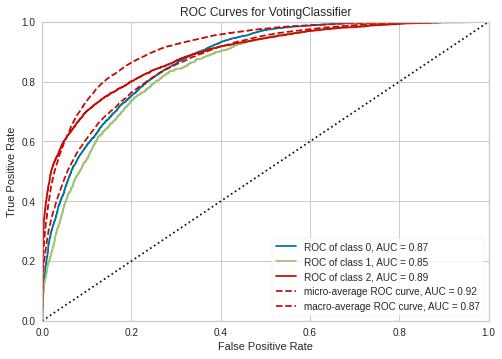

In [24]:
plot_model(blender)

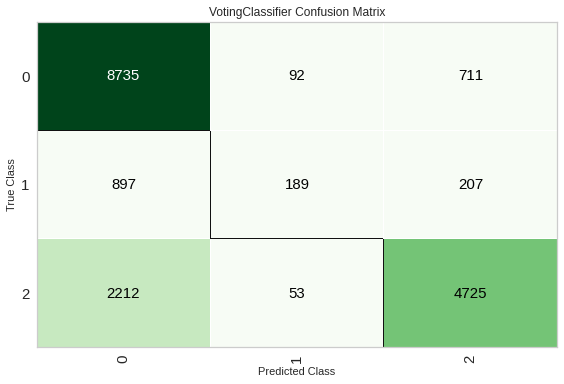

In [25]:
plot_model(blender, plot = 'confusion_matrix')

In [26]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
best = automl(optimize = 'Recall')
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [28]:
pred_holdouts = predict_model(blender)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7659,0.8781,0.5793,0.7642,0.7476,0.5487,0.565


,id,construction_year,gps_height,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,ward_Chalinze,ward_Chanika,ward_Igosi,ward_Imalinyi,ward_Itete,ward_Kitunda,ward_Maji ya Chai,ward_Maramba,ward_Matola,ward_Mdandu,ward_Mishamo,ward_Msindo,ward_Mtwango,ward_Nduruma,ward_Ngarenanyuki,ward_Others,ward_Siha Kati,ward_Usuka,ward_Vikindu,ward_Wangingombe,ward_Zinga/Ikerege,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,funder_Danida,funder_Dhv,funder_District Council,funder_Dwe,...,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,subvillage_Kanisani,subvillage_Kati,subvillage_Kibaoni,subvillage_Madukani,subvillage_Majengo,subvillage_Mapinduzi,subvillage_Mbuyuni,subvillage_Miembeni,subvillage_Mjimwema,subvillage_Mjini,subvillage_Mkwajuni,subvillage_Mlimani,subvillage_Msikitini,subvillage_Mtakuja,subvillage_Muungano,subvillage_Mwenge,subvillage_Other,subvillage_Others,subvillage_Shuleni,subvillage_Sokoni,subvillage_Songambele,status_group,Label,Score
0,2369.0,2000.0,1373.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,functional,functional,0.8377
1,43734.0,2002.0,1120.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,non functional,non functional,0.6002
2,17667.0,1991.0,1409.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,functional needs repair,functional,0.6127
3,56384.0,1980.0,306.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,non functional,non functional,0.9951
4,45781.0,1998.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,functional,functional,0.6603


In [29]:
predict_test = predict_model(best, data = Test)
predict_test

,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height,Label,Score
0,50785,seasonal,2012,Others,other,Others,Mbulu,Others,1996,non functional,0.65
1,51630,insufficient,2000,Others,communal standpipe,Government Of Tanzania,Arusha Rural,Others,1569,non functional,0.61
2,17168,insufficient,2010,Others,other,Government Of Tanzania,Singida Rural,Others,1567,non functional,0.59
3,45559,dry,1987,Others,other,Others,Liwale,Others,267,non functional,1.00
4,49871,enough,2000,Others,communal standpipe,Others,Mbinga,Others,1260,functional,0.99
...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,enough,1988,Others,communal standpipe,Danida,Bagamoyo,Others,34,non functional,0.76
14846,18990,insufficient,1994,Others,hand pump,Others,Kilindi,Others,0,functional,0.97
14847,28749,insufficient,2010,Others,communal standpipe,Government Of Tanzania,Singida Rural,Others,1476,functional,1.00
14848,33492,insufficient,2009,Others,communal standpipe,Others,Songea Rural,Others,998,functional,0.99


In [31]:
submission = predict_test[['id','Label']]
submission = submission.rename(columns={'Label': 'status_group'})
submission.to_csv("submission.csv")

In [32]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
save_model(best, model_name='best-model1')

In [ ]:
loaded_bestmodel = load_model('best-model1')

In [ ]:
#!pip install scikit-learn==0.23.2